In [ ]:
 0.977  , 0.962,, 0.21, 0.445

"Adam", "RMSprop", "Adadelta", "Adagrad"

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1093 - loss: 0.1918
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2009 - loss: 0.1199
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2841 - loss: 0.1013
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3478 - loss: 0.0943
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3928 - loss: 0.0908
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4259 - loss: 0.0899
테스트 정확도: 0.43459999561309814


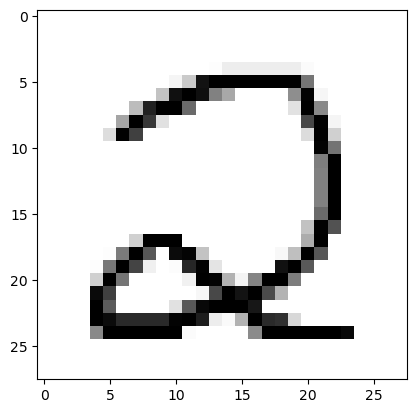

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
추정된 숫자= 6


In [23]:
import matplotlib.pyplot as plt
import tensorflow as tf

(train_images, train_labels), (test_images, test_labels)	= tf.keras.datasets.mnist.load_data()

train_images = train_images.reshape((60000, 784))
train_images = train_images.astype('float32') / 255.0

test_images = test_images.reshape((10000, 784))
test_images = test_images.astype('float32') / 255.0

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

inputs = Input(shape = (784,))
hidden1 = Dense(512, activation = 'relu')(inputs)
outputs = Dense(10, activation = 'sigmoid')(hidden1)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='Adagrad', loss = 'mse', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=128)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('테스트 정확도:', test_acc)

import cv2 as cv

image = cv.imread('test.png', cv.IMREAD_GRAYSCALE)
image = cv.resize(image, (28, 28))
image = image.astype('float32')
image = image.reshape(1, 784)
image = 255-image
image /= 255.0

plt.imshow(image.reshape(28, 28),cmap='Greys')
plt.show()

pred = model.predict(image.reshape(1, 784), batch_size=1)
print("추정된 숫자=", pred.argmax())

In [27]:
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2 as cv


(train_images, train_labels), (test_images, test_labels)	= tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000, 784))
train_images = train_images.astype('float32') / 255.0
test_images = test_images.reshape((10000, 784))
test_images = test_images.astype('float32') / 255.0
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)


optimizers = ["adam", "rmsprop", "adadelta", "adagrad"]
optimizer_names = ["Adam", "RMSprop", "Adadelta", "Adagrad"]
dic = {}
for optimizer, name in zip(optimizers, optimizer_names):
    inputs = Input(shape = (784,))
    hidden1 = Dense(512, activation = 'relu')(inputs)
    outputs = Dense(10, activation = 'sigmoid')(hidden1)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=optimizer, loss = 'mse', metrics=['accuracy'])
    model.fit(train_images, train_labels, epochs=5, batch_size=128)
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    dic[name] = test_acc
    print(f"Optimizer : {name}")
    print('테스트 정확도:', test_acc)
    
    """image = cv.imread('test.png', cv.IMREAD_GRAYSCALE)
    image = cv.resize(image, (28, 28))
    image = image.astype('float32')
    image = image.reshape(1, 784)
    image = 255-image
    image /= 255.0

    plt.imshow(image.reshape(28, 28),cmap='Greys')
    plt.show()
    
    pred = model.predict(image.reshape(1, 784), batch_size=1)
    print("추정된 숫자=", pred.argmax())"""

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7949 - loss: 0.0365
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9576 - loss: 0.0079
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9726 - loss: 0.0053
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9796 - loss: 0.0042
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9847 - loss: 0.0032
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9742 - loss: 0.0047
Optimizer : Adam
테스트 정확도: 0.9779000282287598
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7913 - loss: 0.0414
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9266 - loss: 0.0136
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9438 - loss: 0.0104
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9539 - loss: 0.0087
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9604 - loss: 0.0074
313/313 ━━━━━━━━━━━━━━━━━━━━ 1

In [28]:
dic

{'Adam': 0.9779000282287598,
 'RMSprop': 0.9611999988555908,
 'Adadelta': 0.15230000019073486,
 'Adagrad': 0.3977000117301941}